In [948]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np
import xgboost as xgb

## Importing Dataset

In [949]:
df = pd.read_csv('/Users/ashutoshpatil/Downloads/Crime_Data_from_2020_to_Present.csv').tail(200000)
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
805101,231410830,05/18/2023 12:00:00 AM,05/18/2023 12:00:00 AM,1230,14,Pacific,1463,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AA,Adult Arrest,626.0,NaN,NaN,NaN,5300 MCCONNELL AV,NaN,33.9793,-118.4207
805102,232112240,07/28/2023 12:00:00 AM,07/27/2023 12:00:00 AM,1524,21,Topanga,2156,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,6600 TOPANGA CANYON BL,NaN,34.1904,-118.6059
805103,231913749,09/05/2023 12:00:00 AM,09/04/2023 12:00:00 AM,2000,19,Mission,1956,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,14900 TUBA ST,NaN,34.2563,-118.4571
805104,230614149,08/21/2023 12:00:00 AM,08/21/2023 12:00:00 AM,130,6,Hollywood,632,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1200 SUNSET PLAZA DR,NaN,34.1070,-118.3869
805105,230321560,12/21/2023 12:00:00 AM,12/20/2023 12:00:00 AM,2135,3,Southwest,333,1,210,ROBBERY,...,AO,Adult Other,210.0,NaN,NaN,NaN,2800 CRENSHAW BL,NaN,34.0278,-118.3378


## Data Pre-processing

In [950]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 805101 to 1005100
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           200000 non-null  int64  
 1   Date Rptd       200000 non-null  object 
 2   DATE OCC        200000 non-null  object 
 3   TIME OCC        200000 non-null  int64  
 4   AREA            200000 non-null  int64  
 5   AREA NAME       200000 non-null  object 
 6   Rpt Dist No     200000 non-null  int64  
 7   Part 1-2        200000 non-null  int64  
 8   Crm Cd          200000 non-null  int64  
 9   Crm Cd Desc     200000 non-null  object 
 10  Mocodes         159617 non-null  object 
 11  Vict Age        200000 non-null  int64  
 12  Vict Sex        160952 non-null  object 
 13  Vict Descent    160946 non-null  object 
 14  Premis Cd       199994 non-null  float64
 15  Premis Desc     199886 non-null  object 
 16  Weapon Used Cd  48560 non-null   float64
 17  Weap

In [951]:
# checking null percentage of each column
round((df.isnull().sum() / len(df)) * 100,2)

DR_NO               0.00
Date Rptd           0.00
DATE OCC            0.00
TIME OCC            0.00
AREA                0.00
AREA NAME           0.00
Rpt Dist No         0.00
Part 1-2            0.00
Crm Cd              0.00
Crm Cd Desc         0.00
Mocodes            20.19
Vict Age            0.00
Vict Sex           19.52
Vict Descent       19.53
Premis Cd           0.00
Premis Desc         0.06
Weapon Used Cd     75.72
Weapon Desc        75.72
Status              0.00
Status Desc         0.00
Crm Cd 1            0.00
Crm Cd 2           95.07
Crm Cd 3           99.85
Crm Cd 4          100.00
LOCATION            0.00
Cross Street       86.95
LAT                 0.00
LON                 0.00
dtype: float64

In [952]:
# dropping columns whose null % are > 60
df = df.drop(columns = ['Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 2','Crm Cd 3','Cross Street','Crm Cd 4'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 805101 to 1005100
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DR_NO         200000 non-null  int64  
 1   Date Rptd     200000 non-null  object 
 2   DATE OCC      200000 non-null  object 
 3   TIME OCC      200000 non-null  int64  
 4   AREA          200000 non-null  int64  
 5   AREA NAME     200000 non-null  object 
 6   Rpt Dist No   200000 non-null  int64  
 7   Part 1-2      200000 non-null  int64  
 8   Crm Cd        200000 non-null  int64  
 9   Crm Cd Desc   200000 non-null  object 
 10  Mocodes       159617 non-null  object 
 11  Vict Age      200000 non-null  int64  
 12  Vict Sex      160952 non-null  object 
 13  Vict Descent  160946 non-null  object 
 14  Premis Cd     199994 non-null  float64
 15  Premis Desc   199886 non-null  object 
 16  Status        199999 non-null  object 
 17  Status Desc   200000 non-null  object 
 18

In [953]:
# convert date,time columns to datetime
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'],format = 'mixed',errors = 'coerce')
df['DATE OCC'] = df['DATE OCC'].str.split(' ').str[0]
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'],format = 'mixed',errors='coerce')

In [954]:
# normalize values in same format 
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

# extracting features from date for better ml predictions
df['DayOfWeek'] = df['DATE OCC'].dt.day_name()
df['Month'] = df['DATE OCC'].dt.month
df['Day'] = df['DATE OCC'].dt.day
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)
df['Hour'] = df['TIME OCC'].str[:2].astype(int)
df['Min'] = df['TIME OCC'].str[2:].astype(int)

In [955]:
# dropping rows where values are missing
df = df.dropna(subset=['Vict Sex', 'Vict Descent','Status','Mocodes','Premis Cd','Premis Desc'])
df['Crm Cd 1'] = df['Crm Cd 1'].fillna(512)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159451 entries, 805101 to 1005100
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         159451 non-null  int64         
 1   Date Rptd     159451 non-null  datetime64[ns]
 2   DATE OCC      159451 non-null  datetime64[ns]
 3   TIME OCC      159451 non-null  object        
 4   AREA          159451 non-null  int64         
 5   AREA NAME     159451 non-null  object        
 6   Rpt Dist No   159451 non-null  int64         
 7   Part 1-2      159451 non-null  int64         
 8   Crm Cd        159451 non-null  int64         
 9   Crm Cd Desc   159451 non-null  object        
 10  Mocodes       159451 non-null  object        
 11  Vict Age      159451 non-null  int64         
 12  Vict Sex      159451 non-null  object        
 13  Vict Descent  159451 non-null  object        
 14  Premis Cd     159451 non-null  float64       
 15  Premis Desc   15

In [956]:
# some age values are in -ve so dropping those
df = df[df['Vict Age'] >= 0]

In [957]:
# create age brackets
bins = [-1, 2, 5, 12, 17, 24, 44, 54, 74, 99]
labels = ['Infant/Toddler', 'Preschool', 'Child', 'Teenager', 'Young Adult','Adult', 'Middle Age','Senior 65-74', 'Elderly 75+']
df['Age Bracket'] = pd.cut(df['Vict Age'], bins=bins, labels=labels)

In [958]:
# removing values other than m,f and x 
df = df[df['Vict Sex'].isin(['M','F','X'])]

## Exploratory Data Analysis

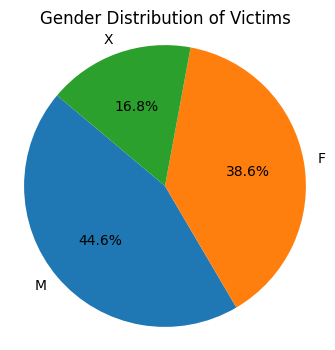

In [959]:
# crimes on each sex
gender_counts = df.groupby('Vict Sex').size().sort_values(ascending = False)

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Victims')
plt.axis('equal') 
plt.show()

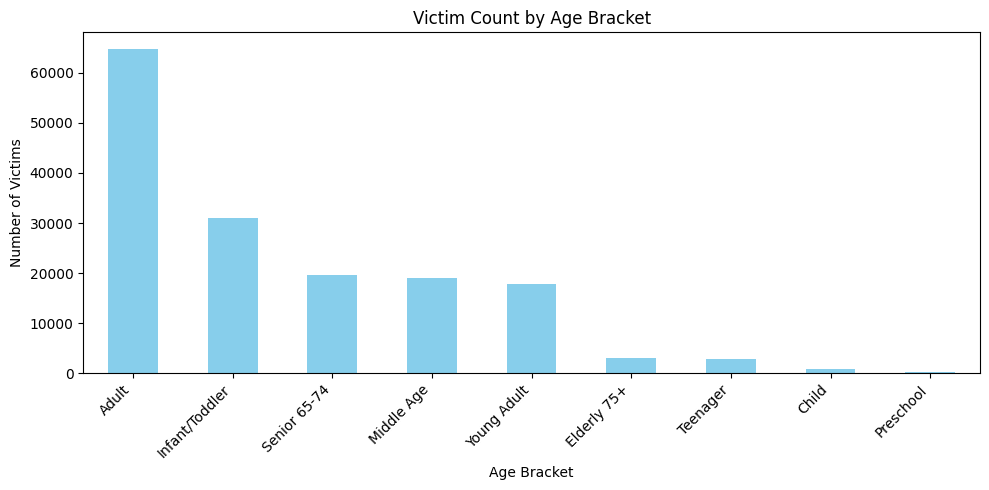

In [960]:
# crimes on each age group
age__bracket_counts = df.groupby('Age Bracket',observed = True).size().sort_values(ascending = False)
# observed = True means if any group has 0 count then it won't show in result

plt.figure(figsize=(10, 5))
age__bracket_counts.plot(kind='bar', color='skyblue')
plt.title('Victim Count by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

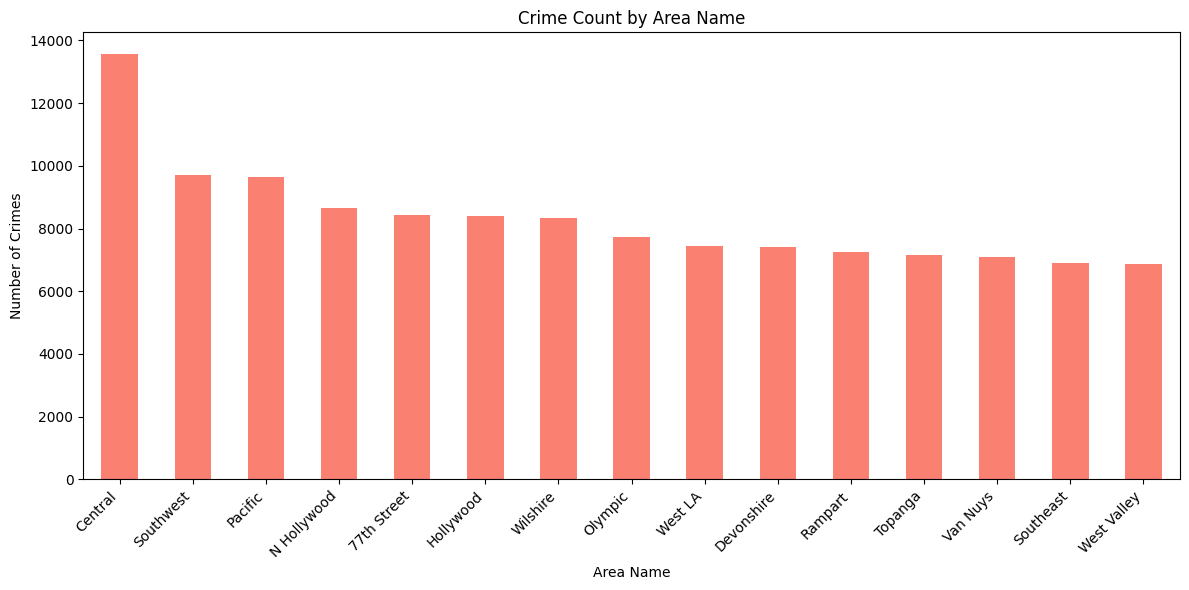

In [961]:
# top 15 areas by crime
area_counts = df.groupby('AREA NAME',observed = True).size().sort_values(ascending = False).head(15)

plt.figure(figsize=(12, 6))
area_counts.plot(kind='bar',color = 'salmon')
plt.title('Crime Count by Area Name')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [962]:
# replacing intials of victim descent to fullforms for better understanding
descent_map = {
    'H': 'Hispanic/Latin/Mexican',
    'W': 'White (Non-Hispanic)',
    'B': 'Black/African American',
    'X': 'Unknown',
    'O': 'Other',
    'A': 'Asian',
    'K': 'Korean',
    'F': 'Filipino',
    'C': 'Chinese',
    'J': 'Japanese',
    'V': 'Vietnamese',
    'I': 'American Indian/Alaskan Native',
    'Z': 'Cambodian',
    'P': 'Pacific Islander',
    'U': 'Hawaiian',
    'D': 'Laotian',
    'L': 'South Asian',
    'G': 'Guamanian',
    'S': 'Samoan',
    '-': 'Missing/Invalid'
}
df['Vict Descent'] = df['Vict Descent'].map(descent_map)

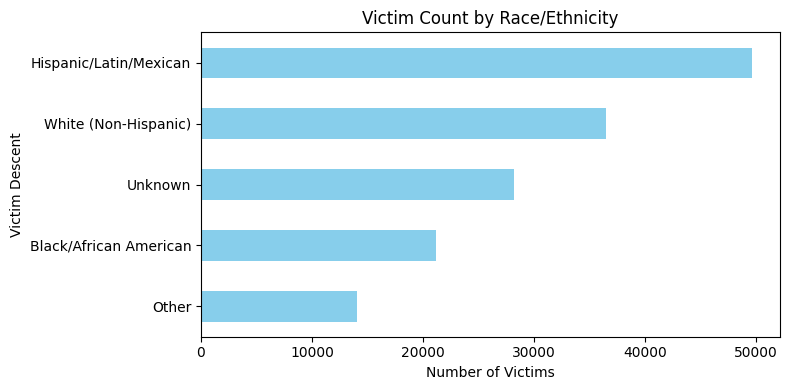

In [963]:
# crimes on victims by descents (top 5)
descent_counts = df.groupby('Vict Descent',observed = True).size().sort_values(ascending = False).head()

plt.figure(figsize=(8, 4))
descent_counts.plot(kind='barh', color='skyblue')
plt.title('Victim Count by Race/Ethnicity')
plt.xlabel('Number of Victims')
plt.ylabel('Victim Descent')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [964]:
# importing ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [965]:
# dividing crimes into categories for better EDA
def categorize_crime(crime):
    crime = crime.lower()
    if any(keyword in crime for keyword in ['burglary', 'theft', 'stolen', 'arson', 'vandalism', 'coin machine']):
        return 'Property Crimes'
    elif any(keyword in crime for keyword in ['assault', 'homicide', 'kidnapping', 'robbery', 'battery', 'lynching']):
        return 'Violent Crimes'
    elif any(keyword in crime for keyword in ['embezzlement', 'fraud', 'counterfeit', 'extortion', 'bribery']):
        return 'Fraud/Financial Crimes'
    elif any(keyword in crime for keyword in ['rape', 'sexual', 'lewd', 'pornography', 'indecent', 'sodomy']):
        return 'Sex Crimes'
    else:
        return 'Other Crimes'

df['Crime Category'] = df['Crm Cd Desc'].apply(categorize_crime)

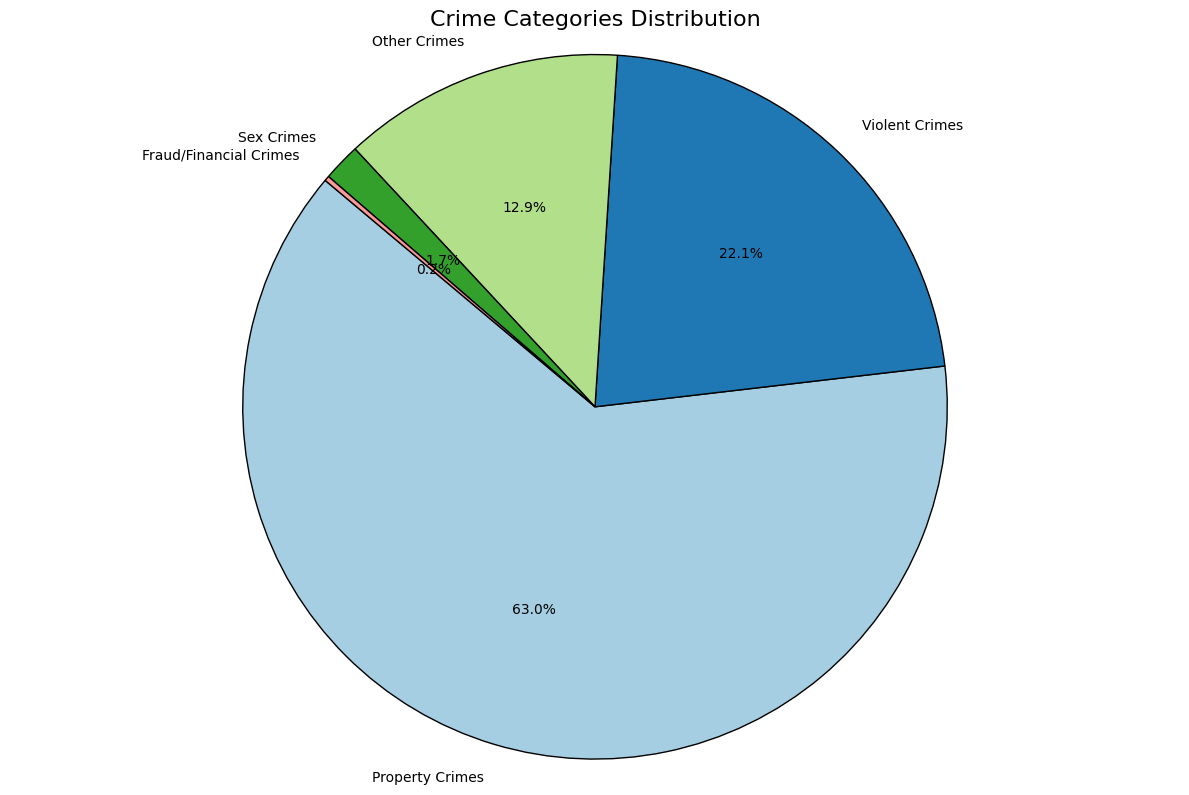

In [966]:
# % of crimes 

category_counts = df['Crime Category'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors, 
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.title('Crime Categories Distribution', fontsize=16)
plt.axis('equal') 
plt.tight_layout()  
plt.show()

In [967]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159426 entries, 805101 to 1005100
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           159426 non-null  int64         
 1   Date Rptd       159426 non-null  datetime64[ns]
 2   DATE OCC        159426 non-null  datetime64[ns]
 3   TIME OCC        159426 non-null  object        
 4   AREA            159426 non-null  int64         
 5   AREA NAME       159426 non-null  object        
 6   Rpt Dist No     159426 non-null  int64         
 7   Part 1-2        159426 non-null  int64         
 8   Crm Cd          159426 non-null  int64         
 9   Crm Cd Desc     159426 non-null  object        
 10  Mocodes         159426 non-null  object        
 11  Vict Age        159426 non-null  int64         
 12  Vict Sex        159426 non-null  object        
 13  Vict Descent    159426 non-null  object        
 14  Premis Cd       159426 non-null  fl

In [968]:
# creating timeofday col for better analysis
def map_time_of_day(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour <= 19:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(map_time_of_day)

## Building model using Random Forest

In [969]:
# for identifying gender based on given inputs
features = ['AREA NAME', 'Crime Category','Age Bracket']
target = 'Vict Sex'
X = df[features].copy()
y = df[target]

In [970]:
# performing encoding to convert categorical values to numerical
encoders = {}
for col in features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

In [971]:
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

In [972]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [973]:
model = RandomForestClassifier(n_estimators=750, random_state=26)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=750, random_state=26)

In [974]:
y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)

Accuracy : 61.11773191996488


In [975]:
# get all unique area names
area_names = df['AREA NAME'].unique()

# Create test data — one row per area
test_data = pd.DataFrame([{
    'AREA NAME': area,
    'Crime Category': 'Violent Crimes',      
    'Age Bracket': 'Adult'         
} for area in area_names])

# encode features
for col in features:
    test_data[col] = encoders[col].transform(test_data[col])

# Predict probabilities
probabilities = model.predict_proba(test_data)

results = []

# zip(['F', 'M', 'X'], [0.65, 0.30, 0.05]) → [('F', 0.65), ('M', 0.30), ('X', 0.05)]
for i, area in enumerate(area_names):
    class_prob = dict(zip(target_encoder.classes_, probabilities[i]))
    
# extracting the predicted probability for each class ('F', 'M', 'X') from the dictionary
    f_prob = class_prob.get('F', 0)
    m_prob = class_prob.get('M', 0)
    x_prob = class_prob.get('X', 0)
    
    best_label = target_encoder.classes_[probabilities[i].argmax()]
    
    results.append({
        'AREA NAME': area,
        'F Probability (%)': f_prob * 100,
        'M Probability (%)': m_prob * 100,
        'Most Likely Time': best_label
    })

# convert to DataFrame so we can sort by F %
results_df = pd.DataFrame(results)

for _, row in results_df.iterrows():
    print(f"📍 {row['AREA NAME']}")
    print(f"   Crimes on Female (F): {row['F Probability (%)']:.2f}%")
    print(f"   Crimes on Male (M):   {row['M Probability (%)']:.2f}%")
    print("-" * 40)

📍 Pacific
   Crimes on Female (F): 47.70%
   Crimes on Male (M):   52.30%
----------------------------------------
📍 Topanga
   Crimes on Female (F): 51.67%
   Crimes on Male (M):   48.33%
----------------------------------------
📍 Hollywood
   Crimes on Female (F): 43.24%
   Crimes on Male (M):   56.49%
----------------------------------------
📍 Southwest
   Crimes on Female (F): 55.38%
   Crimes on Male (M):   43.68%
----------------------------------------
📍 Foothill
   Crimes on Female (F): 51.09%
   Crimes on Male (M):   48.91%
----------------------------------------
📍 Hollenbeck
   Crimes on Female (F): 47.66%
   Crimes on Male (M):   52.34%
----------------------------------------
📍 Central
   Crimes on Female (F): 38.70%
   Crimes on Male (M):   60.18%
----------------------------------------
📍 West LA
   Crimes on Female (F): 46.25%
   Crimes on Male (M):   52.62%
----------------------------------------
📍 Newton
   Crimes on Female (F): 49.40%
   Crimes on Male (M):   50.47%

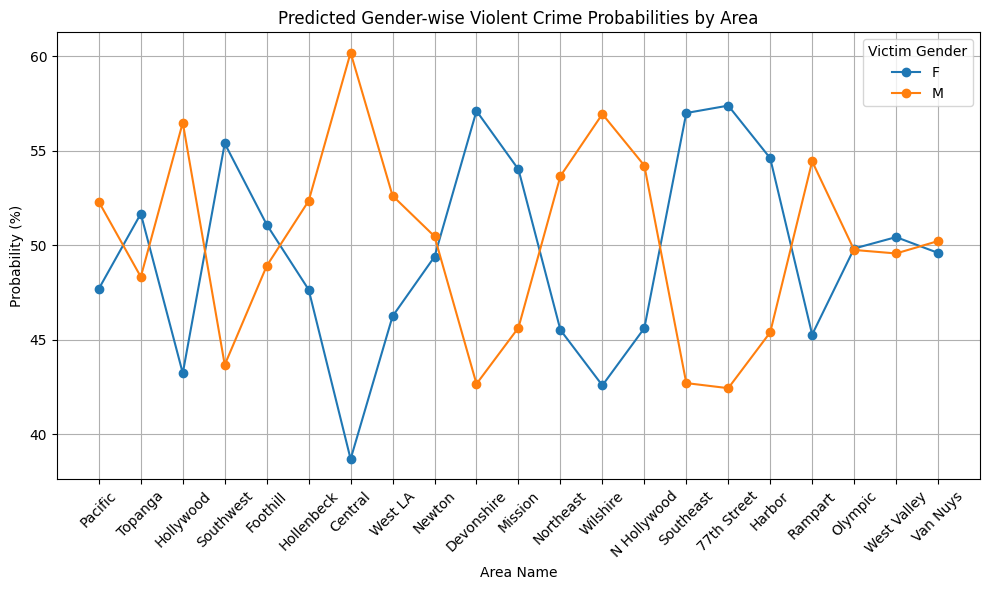

In [976]:
# Plot the line graph
plt.figure(figsize=(10, 6))

# Plot each gender's probability
for gender_col in ['F Probability (%)', 'M Probability (%)']:
    plt.plot(results_df['AREA NAME'], results_df[gender_col], marker='o', label=gender_col.split()[0])

# Graph formatting
plt.title("Predicted Gender-wise Violent Crime Probabilities by Area")
plt.xlabel("Area Name")
plt.ylabel("Probability (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Victim Gender")
plt.tight_layout()

# Show plot
plt.show()

In [977]:
# FOR SEX CRIMES OF ADULT AGE GROUP

# get all unique area names
area_names = df['AREA NAME'].unique()

# Create test data — one row per area
test_data = pd.DataFrame([{
    'AREA NAME': area,
    'Crime Category': 'Sex Crimes',      
    'Age Bracket': 'Adult'         
} for area in area_names])

# encode features
for col in features:
    test_data[col] = encoders[col].transform(test_data[col])

# Predict probabilities
probabilities = model.predict_proba(test_data)

results = []

# zip(['F', 'M', 'X'], [0.65, 0.30, 0.05]) → [('F', 0.65), ('M', 0.30), ('X', 0.05)]
for i, area in enumerate(area_names):
    class_prob = dict(zip(target_encoder.classes_, probabilities[i]))
    
# extracting the predicted probability for each class ('F', 'M', 'X') from the dictionary
    f_prob = class_prob.get('F', 0)
    m_prob = class_prob.get('M', 0)
    x_prob = class_prob.get('X', 0)
    
    best_label = target_encoder.classes_[probabilities[i].argmax()]
    
    results.append({
        'AREA NAME': area,
        'F Probability (%)': f_prob * 100,
        'M Probability (%)': m_prob * 100,
        'Most Likely Time': best_label
    })

# convert to DataFrame so we can sort by F %
results_df = pd.DataFrame(results)

for _, row in results_df.iterrows():
    print(f"📍 {row['AREA NAME']}")
    print(f"   Crimes on Female (F): {row['F Probability (%)']:.2f}%")
    print(f"   Crimes on Male (M):   {row['M Probability (%)']:.2f}%")
    print("-" * 40)

📍 Pacific
   Crimes on Female (F): 71.85%
   Crimes on Male (M):   28.15%
----------------------------------------
📍 Topanga
   Crimes on Female (F): 78.91%
   Crimes on Male (M):   21.09%
----------------------------------------
📍 Hollywood
   Crimes on Female (F): 82.26%
   Crimes on Male (M):   17.74%
----------------------------------------
📍 Southwest
   Crimes on Female (F): 82.41%
   Crimes on Male (M):   17.59%
----------------------------------------
📍 Foothill
   Crimes on Female (F): 61.15%
   Crimes on Male (M):   38.85%
----------------------------------------
📍 Hollenbeck
   Crimes on Female (F): 80.58%
   Crimes on Male (M):   19.42%
----------------------------------------
📍 Central
   Crimes on Female (F): 75.69%
   Crimes on Male (M):   24.31%
----------------------------------------
📍 West LA
   Crimes on Female (F): 73.13%
   Crimes on Male (M):   25.28%
----------------------------------------
📍 Newton
   Crimes on Female (F): 81.49%
   Crimes on Male (M):   18.51%

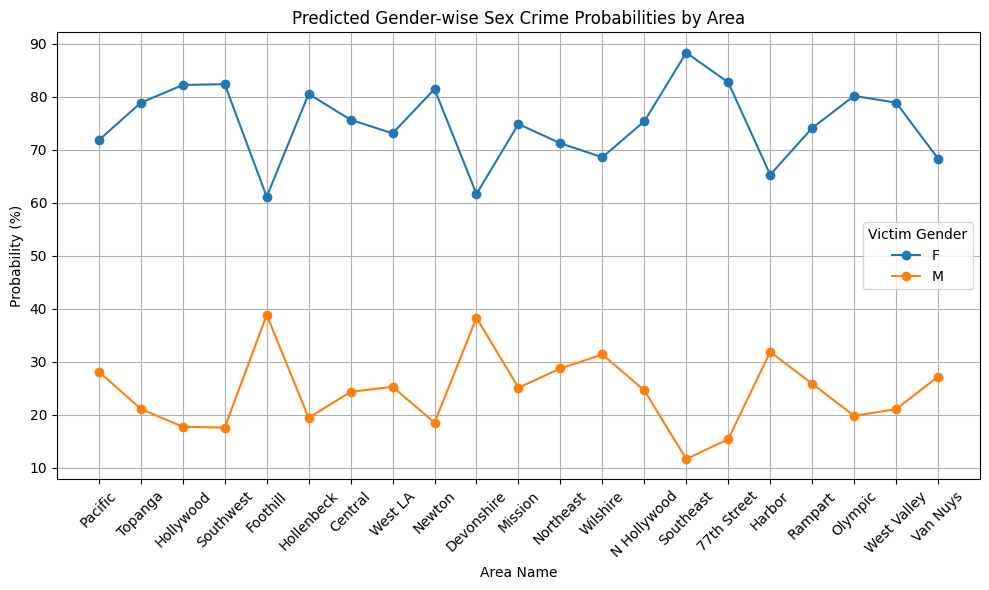

In [978]:
# Plot the line graph
plt.figure(figsize=(10, 6))

# Plot each gender's probability
for gender_col in ['F Probability (%)', 'M Probability (%)']:
    plt.plot(results_df['AREA NAME'], results_df[gender_col], marker='o', label=gender_col.split()[0])

# Graph formatting
plt.title("Predicted Gender-wise Sex Crime Probabilities by Area")
plt.xlabel("Area Name")
plt.ylabel("Probability (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Victim Gender")
plt.tight_layout()

# Show plot
plt.show()